In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import re
import requests
import json
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import warnings

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

## Data Gathering


In [3]:
# import twitter_archive file into a dataframe

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


In [3]:
 # Use the Requests library to download data from url (image_predictions.tsv)
    
url_image_pred = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url_image_pred, allow_redirects = True)
open('image_predictions.tsv', 'wb').write(response.content)


335079

In [8]:
image_predictions = pd.read_csv('image_predictions.tsv',sep = '\t')

#### Collect additional data from twitter API and read it into a dataframe

In [5]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [6]:
auth = OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)



In [7]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
count = 0
fails_dict = {}
start = timer()

In [8]:
tweet_ids = df_1.tweet_id.values
len(tweet_ids)
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 75


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 79


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [11]:
tweet_json = pd.read_json('tweet-json.txt', lines = True)


## Assessing Data


In [12]:
# inspect first three rows of data

twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [13]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1392,700062718104104960,NaN,NaN,2016-02-17 21:02:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eazy-E. He's colorful af. Must be rare...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700062718...,6,10,Eazy,None,None,None,None
414,822859134160621569,NaN,NaN,2017-01-21 17:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hobbes. He was told he was going to th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822859134...,12,10,Hobbes,None,None,None,None
936,753375668877008896,NaN,NaN,2016-07-13 23:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's mischievous af. Doesn't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None
2322,666430724426358785,NaN,NaN,2015-11-17 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh boy what a pup! Sunglasses take this one to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666430724...,6,10,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [14]:
twitter_archive.value_counts(['floofer','pupper','puppo','doggo'])

floofer  pupper  puppo  doggo
None     None    None   None     1976
         pupper  None   None      245
         None    None   doggo      83
                 puppo  None       29
         pupper  None   doggo      12
floofer  None    None   None        9
None     None    puppo  doggo       1
floofer  None    None   doggo       1
dtype: int64

In [15]:
twitter_archive['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [16]:
# check for duplicated ids
twitter_archive['tweet_id'].duplicated().sum()

0

In [17]:
# check for nulls in each column

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
# check for duplicate values

twitter_archive.duplicated().sum()

0

In [19]:
# check for the count of each denominator of rating

twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [20]:
# check for count of distinct names

twitter_archive['name'].value_counts().head(10)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Name: name, dtype: int64

In [21]:
# summary statistics of data

twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [23]:
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [24]:
image_predictions.duplicated().sum()

0

In [25]:
image_predictions['tweet_id'].duplicated().sum()

0

In [26]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# summary statistics of dataframe

image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
image_predictions.duplicated().sum()

0

In [29]:
image_predictions['p1'].value_counts().head(15)

golden_retriever            150
Labrador_retriever          100
Pembroke                     89
Chihuahua                    83
pug                          57
chow                         44
Samoyed                      43
toy_poodle                   39
Pomeranian                   38
cocker_spaniel               30
malamute                     30
French_bulldog               26
miniature_pinscher           23
Chesapeake_Bay_retriever     23
seat_belt                    22
Name: p1, dtype: int64

In [30]:
image_predictions['p2'].value_counts().head(15)

Labrador_retriever          104
golden_retriever             92
Cardigan                     73
Chihuahua                    44
Pomeranian                   42
Chesapeake_Bay_retriever     41
French_bulldog               41
toy_poodle                   37
cocker_spaniel               34
miniature_poodle             33
Siberian_husky               33
beagle                       28
Pembroke                     27
Eskimo_dog                   27
collie                       27
Name: p2, dtype: int64

In [31]:
image_predictions['p3'].value_counts().head(15)

Labrador_retriever           79
Chihuahua                    58
golden_retriever             48
Eskimo_dog                   38
kelpie                       35
kuvasz                       34
Staffordshire_bullterrier    32
chow                         32
beagle                       31
cocker_spaniel               31
Pomeranian                   29
toy_poodle                   29
Pekinese                     29
Chesapeake_Bay_retriever     27
Great_Pyrenees               27
Name: p3, dtype: int64

In [32]:
# inspect first few rows of dataframe

tweet_json.head(3)



,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,6973,33700,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,5275,29228,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,3464,21975,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [33]:
# drop columns not needed in analysis
tweet_json = tweet_json[['id','retweet_count','favorite_count']]

In [34]:
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,6973,33700
1,892177421306343426,5275,29228
2,891815181378084864,3464,21975
3,891689557279858688,7193,36794
4,891327558926688256,7719,35187


In [35]:
tweet_json.tail()

,id,retweet_count,favorite_count
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112
2326,666020888022790149,419,2284


In [36]:
# check for nulls in all columns

tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [37]:
# check for duplicates in dataframe

tweet_json.duplicated().sum()

0

In [38]:
# summary statistics of data

tweet_json.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2459.390632,7028.282768
std,6.820795e+16,4165.004369,10921.967143
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1221.000000
50%,7.178418e+17,1144.000000,3039.000000
75%,7.986547e+17,2845.000000,8566.000000
max,8.924206e+17,70351.000000,144287.000000


## Quality issues

#### twitter_archive_enhance dataframe
 
1. Some entries are retweets instead of original tweets

2. Wrong names in 'name' column and capitalised first letters of dog names

3. Null values in expanded_urls column

4. Wrongly captured multiple dog stage

5. Rating denominator of 0

6. Source column has html tags and urls attached to the source names

7. Erroneous datatype of tweet_id column

8. Given id column in the tweet_json table has undescriptive name.



  #### image_predictions dataframe
    
1. Erroneous datatype for tweet_id column

2. Mixed case letters for p1, p2, and p3 columns





#### tweet_json dataframe
1. Erroneous datatype for id column


## Tidiness issues

1. Columns: doggo,floofer,pupper and puppo in the twitter_archive table in different columns

2. Columns: rating_numerator and rating_denominator in the twitter_archive table in different columns

3. Dealing with 3 different datasets

## Data Cleaning


In [39]:
# Make copies of all original data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()


### Some entries are retweets instead of  original tweets

#### Define
Remove all rows with retweets and only maintain non null values for the expanded_url as these are tweets with images

#### Code

In [40]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_user_id'].isnull()]


#### Test

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

###  Wrong names in 'name' column and capitalised first letters of dog names

#### Define
Remove all inappropriate names and replace those null cells with 'no name'. Change all names to lower case letters

#### Code

In [42]:
mask = twitter_archive_clean['name'].str.islower() 
column_name = 'name' 
twitter_archive_clean.loc[mask, column_name] = np.nan

#### Test

In [43]:
twitter_archive_clean['name'].value_counts().head(15)



None       603
Lucy        11
Charlie     11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Winston      8
Sadie        8
Lola         8
Daisy        7
Toby         7
Stanley      6
Bailey       6
Bo           6
Name: name, dtype: int64

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        1993 non-null   object 
 13  doggo                       2097 

### Null values in expanded_urls column

#### Define
Maintain only observations with non null values as these are urls with images

#### Code

In [45]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['expanded_urls'].notnull()]

#### Test

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2094 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2094 non-null   object 
 4   source                      2094 non-null   object 
 5   text                        2094 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2094 non-null   int64  
 11  rating_denominator          2094 non-null   int64  
 12  name                        1990 non-null   object 
 13  doggo                       2094 

### Rating denominator of 0

#### Define

Drop observations with denominator equal 0 

#### Code




In [47]:
# assign the dataframe to only values with denominator != 0

twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 0].head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Test

In [48]:
twitter_archive_clean['rating_denominator'].value_counts()


10     2077
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

### Source column has html tags attached to the urls

#### Define

Extract source names from original ones with html tags and urls

#### Code

In [49]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<',x)[0])

#### Test

In [50]:
twitter_archive_clean['source'][0:5]

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

In [51]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### Erroneous datatypes (tweet_id and timestamp ) columns

#### Define
Convert  id columns in all three dataset to str data types.


#### Code

In [52]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
tweet_json_clean['id'] = tweet_json_clean['id'].astype(str);

#### Test

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2094 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2094 non-null   object 
 4   source                      2094 non-null   object 
 5   text                        2094 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2094 non-null   int64  
 11  rating_denominator          2094 non-null   int64  
 12  name                        1990 non-null   object 
 13  doggo                       2094 

In [54]:
image_predictions_clean['tweet_id'].dtype

dtype('O')

In [55]:
tweet_json_clean['id'].dtype

dtype('O')

### Mixed case letters for p1,p2 and p3 columns

#### Define

Change format of all observations for variables p1,p2 and p3 into lower case

#### Code

In [56]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

#### Test

In [57]:
image_predictions_clean[['p1','p2','p3']][0:3]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound


#### Define
Give id column in the tweet_json dataframe a more descriptive name

#### Code

In [58]:
tweet_json_clean= tweet_json_clean.rename(columns={'id':'tweet_id'})

#### Test

In [59]:
tweet_json_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Columns: doggo,floofer,pupper and puppo in the twitter_archive table in different columns

#### Define
Columns: doggo, floofer, pupper and puppo in the twitter_archive table should be merged into one and named 'dog_stage' and acknowledging multiple stages.


#### Code

In [60]:
# replace None with ''

for col in twitter_archive_clean[['doggo', 'floofer', 'puppo', 'pupper']]:
    twitter_archive_clean[col].replace('None', '', inplace =True)


In [61]:
# merge dog stage columns into one

twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']


In [62]:
# separate values of multiple stage

twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'


In [63]:
# replace '' with nan
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == '', 'dog_stage'] = np.nan

# drop original columns with dog stages
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','puppo','pupper'],axis = 1)

#### Test

In [64]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [65]:
twitter_archive_clean.duplicated().sum()

0

In [66]:
twitter_archive_clean['dog_stage'].value_counts()

pupper           220
doggo             72
puppo             23
floofer            9
doggo,puppo        9
doggo,pupper       1
doggo,floofer      1
Name: dog_stage, dtype: int64

### Wrongly captured multiple dog stage

#### Define
Drop observations with wrongly captured dog stage( using 'text' column as reference)

#### Code

In [67]:
twitter_archive_clean[twitter_archive_clean['dog_stage'] == 'doggo,puppo']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,"doggo,puppo"
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,"doggo,puppo"
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,Twitter for iPhone,This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,"doggo,puppo"
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,"doggo,puppo"
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,Vine - Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,"doggo,puppo"
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,"doggo,puppo"
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,Twitter for iPhone,Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,"doggo,puppo"
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,Twitter for iPhone,This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,NaN,"doggo,puppo"
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,Twitter for iPhone,"Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,"doggo,puppo"


In [68]:
twitter_archive_clean[twitter_archive_clean['dog_stage'] == 'doggo,floofer']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,"doggo,floofer"


In [69]:
twitter_archive_clean[twitter_archive_clean['dog_stage'] == 'doggo,pupper']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,"doggo,pupper"


In [70]:
twitter_archive_clean = twitter_archive_clean.drop(200,axis = 0)

#### Test

In [71]:
twitter_archive_clean[twitter_archive_clean['dog_stage'] == 'doggo,floofer']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Columns: rating_numerator and rating_denominator in the twitter_archive table in different columns

#### Define
 Divide the rating numerator by rating denominator and assigned it to a new column called rating

#### Code

In [72]:
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']

#### Test

In [73]:
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,1.2


#### Define
Drop columns in the twitter_archive_clean table that will not be needed in this analysis


#### Code

In [74]:
columns =  ['retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_user_id', 'rating_denominator', 'rating_numerator','timestamp','in_reply_to_status_id', 'retweeted_status_timestamp']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

#### Test

In [75]:
twitter_archive_clean.head(3)

,tweet_id,source,text,expanded_urls,name,dog_stage,rating
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2


#### Merge datasets into one

In [76]:
master_df = pd.merge(twitter_archive_clean,image_predictions_clean, how='inner', on ='tweet_id')
master_df= pd.merge(master_df,tweet_json_clean, how ='inner', on ='tweet_id')
master_df.head(3)


,tweet_id,source,text,expanded_urls,name,dog_stage,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6973,33700
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,5275,29228
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3464,21975


In [77]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1962 non-null   object 
 1   source          1962 non-null   object 
 2   text            1962 non-null   object 
 3   expanded_urls   1962 non-null   object 
 4   name            1864 non-null   object 
 5   dog_stage       301 non-null    object 
 6   rating          1962 non-null   float64
 7   jpg_url         1962 non-null   object 
 8   img_num         1962 non-null   int64  
 9   p1              1962 non-null   object 
 10  p1_conf         1962 non-null   float64
 11  p1_dog          1962 non-null   bool   
 12  p2              1962 non-null   object 
 13  p2_conf         1962 non-null   float64
 14  p2_dog          1962 non-null   bool   
 15  p3              1962 non-null   object 
 16  p3_conf         1962 non-null   float64
 17  p3_dog          1962 non-null   b

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [78]:
master_df.to_csv('twitter_archive_master.csv', index = False)

In [79]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,source,text,expanded_urls,name,dog_stage,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6973,33700
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,5275,29228
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3464,21975
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7193,36794
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,7719,35187


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1962 non-null   int64  
 1   source          1962 non-null   object 
 2   text            1962 non-null   object 
 3   expanded_urls   1962 non-null   object 
 4   name            1864 non-null   object 
 5   dog_stage       301 non-null    object 
 6   rating          1962 non-null   float64
 7   jpg_url         1962 non-null   object 
 8   img_num         1962 non-null   int64  
 9   p1              1962 non-null   object 
 10  p1_conf         1962 non-null   float64
 11  p1_dog          1962 non-null   bool   
 12  p2              1962 non-null   object 
 13  p2_conf         1962 non-null   float64
 14  p2_dog          1962 non-null   bool   
 15  p3              1962 non-null   object 
 16  p3_conf         1962 non-null   float64
 17  p3_dog          1962 non-null   b

## Analyzing and Visualizing Data


### Insights:

1. Relationship between retweet_count and rating.Do tweets with more likes necessarily have good rating?

2. Realtionship between rating and favorite_count as well as retweet_count and favorite_count

3. Relationship between retweet_count and favorite_count

4. Distribution of favorite_count based on dog stage

5. Count of dogs in each dog_stage

6. Sources of tweets with highest occurence regarding dog stages

### Visualization

#### Relationship between rating and retweet_count

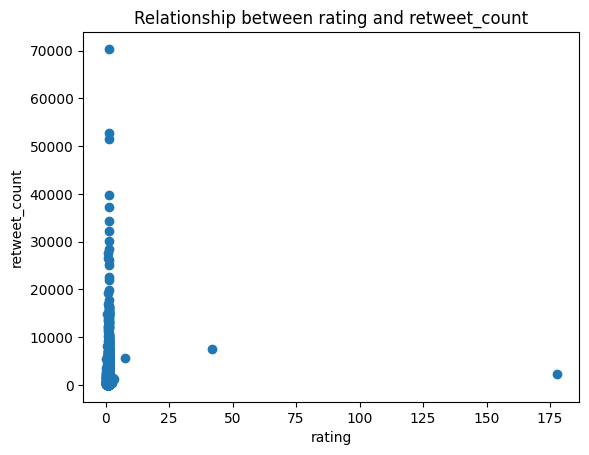

In [81]:
def scatter_plot(x, y):
    plot = plt.scatter(x, y)
    return plot

scatter_plot( x = df['rating'], y = df['retweet_count'])

plt.title('Relationship between rating and retweet_count')
plt.xlabel('rating')
plt.ylabel('retweet_count');

#### Relationship between rating and favorite_count

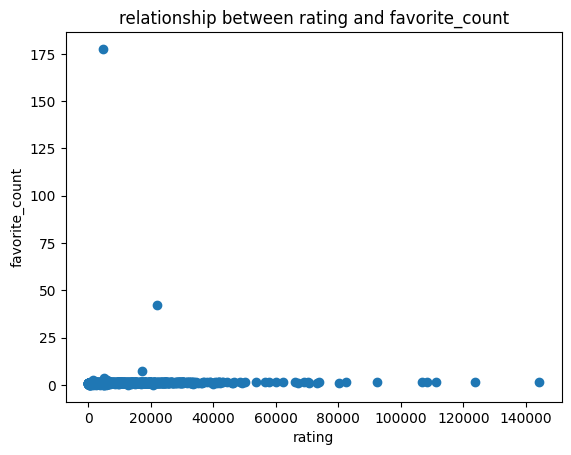

In [82]:
scatter_plot(x = df['favorite_count'], y = df['rating'])
plt.title('relationship between rating and favorite_count')
plt.xlabel('rating')
plt.ylabel('favorite_count');

#### Relationship bewteen favorite_count and retweet

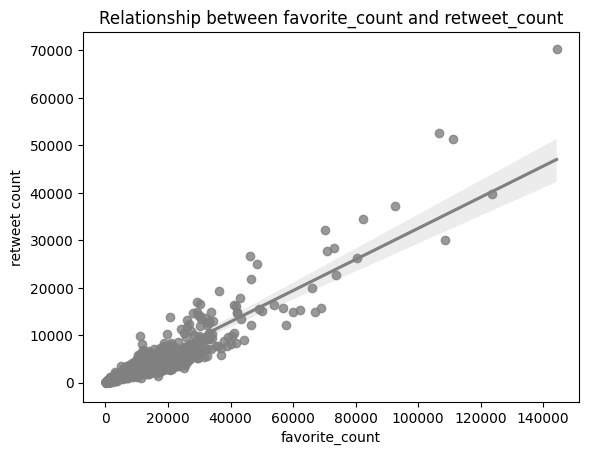

In [83]:
sns.regplot(x =df['favorite_count'], y = df['retweet_count'], data = df, color = 'grey')
plt.title('Relationship between favorite_count and retweet_count')
plt.xlabel('favorite_count')
plt.ylabel('retweet count');

#### Distribution of favorite_count based on dog stage

In [84]:
df.groupby(['dog_stage'])['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,62.0,17535.677419,23990.100543,2149.0,6953.25,10346.5,17179.50,144287.0
"doggo,pupper",1.0,41814.000000,NaN,41814.0,41814.00,41814.0,41814.00,41814.0
"doggo,puppo",8.0,12673.125000,14894.559183,4091.0,6965.50,8015.0,9176.75,49235.0
floofer,7.0,11181.142857,9540.159038,1920.0,4233.00,9419.0,15227.00,28009.0
pupper,201.0,6227.970149,10016.160992,580.0,2042.00,2739.0,6663.00,108532.0
puppo,22.0,19507.272727,26530.454334,2733.0,5907.25,11499.5,17012.00,123701.0


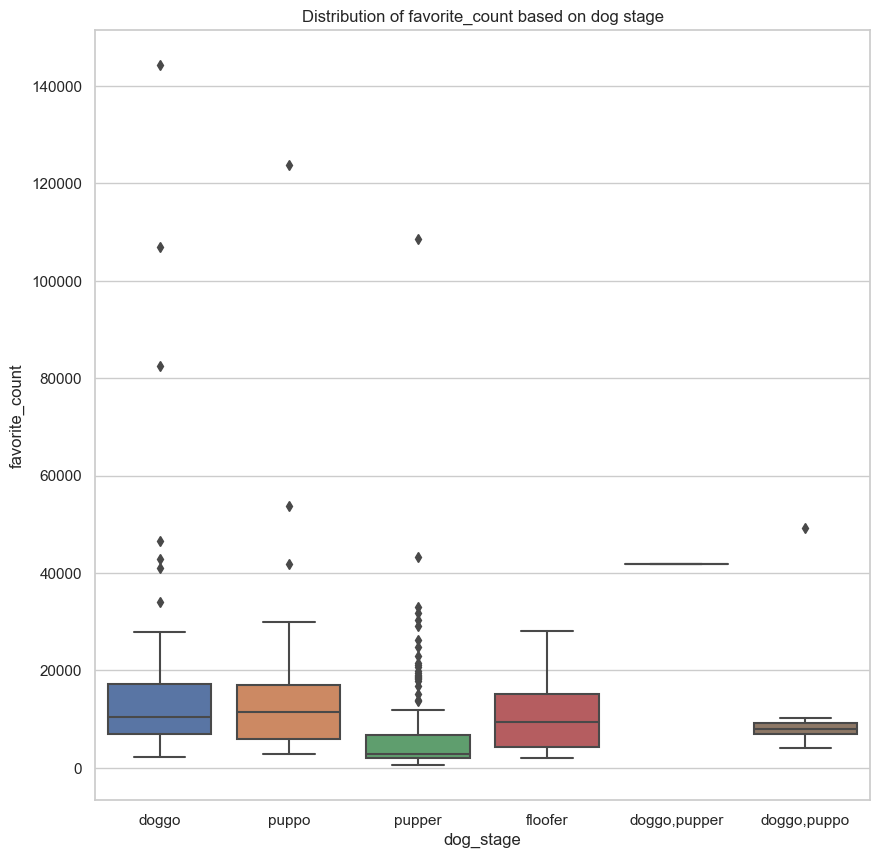

In [85]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxplot(data = df, x = df['dog_stage'], y = df['favorite_count'])
plt.title('Distribution of favorite_count based on dog stage');


#### Count of dogs in each dog_stage

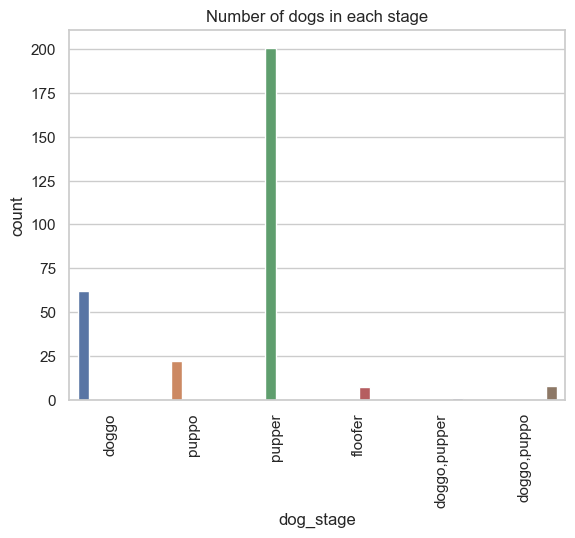

In [86]:
sns.countplot(x = df['dog_stage'], hue =df['dog_stage'], data = df).legend_.remove()
plt.title('Number of dogs in each stage')
plt.xticks(rotation=90);

#### Sources of tweets with highest occurence regarding dog stages

In [87]:
df['source'].value_counts()

Twitter for iPhone    1924
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

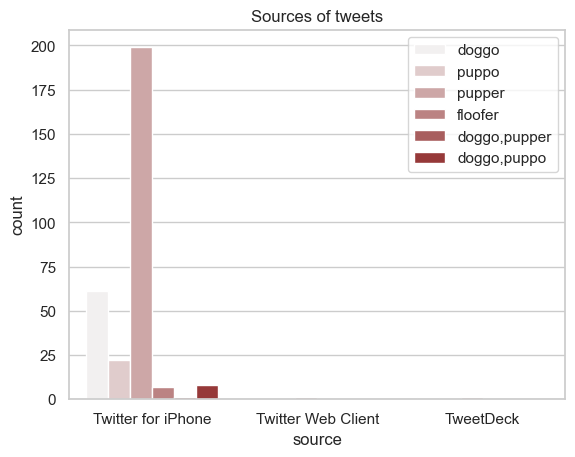

In [88]:
sns.countplot(x = df['source'],hue = df['dog_stage'], data = df, color = 'brown').set_title('Sources of tweets')
plt.legend(loc = 'upper right');


### Summary

From the first two scatter plots above, it shows there is no correlation between rating and retweet_count neither there is between rating and favorite_count with outliers in both plots. This could be as a result of rating for multiple dogs at once.
The third scatter plot shows a strong, positive and linear correlation between favorite_count and retweet count.           
The boxplot shows distribution of favorite_count(tweet likes) based on each dog stage. Doggo,pupper has the least observations.Puppo has a marginal higher favourite count.The plot also shows the varying outliers associated with each variable.                                       
The bar graph that follows displays the count of each dog stage and pupper has the highest, represented by the green bar.      
The concluding bar graph shows sources of tweets, and iphones have the highest with majority of tweets for pupper.

### Limitations of data

No conclusions were made since there was no enought data. Data collected was only for a short period of time. To draw unbias conclusions, more data need to be collected and further analysis done.